In [2]:
import pandas as pd 
import matplotlib.pyplot as plt  
import scipy.stats as st 
import numpy as np 
import datetime as dt 
import seaborn as sns

In [3]:
# read in the core data to use
# increase max number of columns and rows visible
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
combined_df = pd.read_csv("../SB_files/all_listings_df")
combined_df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,NaN,1.0,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,1 private bath,NaN,2.0,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [4]:
combined_df.tail()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
22846,979474665987354279,2023-09-17,Discover the very best of Portland from the co...,NaN,353152177,2020-07-02,United States,within an hour,100%,99%,f,144,348,t,t,Humboldt,45.55880,-122.67811,Entire home,Entire home/apt,8,NaN,2 baths,4.0,4.0,258.0,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland
22847,980422903985425172,2023-09-17,Step into the comfort of this op floor stylish...,The Pearl District is arguably one of Portland...,456054754,2022-04-25,"Portland, OR",within an hour,100%,100%,f,1,2,t,t,Pearl,45.52464,-122.67953,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,2.0,99.0,t,2,2,2,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland
22848,980439098128842446,2023-09-17,*Monthly Rental* Welcome to this beautifully d...,NaN,4618284,2013-01-07,"Portland, OR",NaN,NaN,NaN,f,1,6,t,t,Humboldt,45.55547,-122.66934,Entire home,Entire home/apt,6,NaN,2.5 baths,3.0,3.0,165.0,t,16,46,76,256,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland
22849,980549321160587970,2023-09-17,This house was taken down to the studs and put...,NaN,74481791,2016-05-28,"Portland, OR",NaN,NaN,NaN,f,1,1,t,t,Hosford-Abernethy,45.50239,-122.65328,Entire home,Entire home/apt,6,NaN,2 baths,3.0,3.0,195.0,f,29,59,89,269,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,Portland
22850,980724230458451699,2023-09-17,Located in the Mississippi and Alberta Arts Di...,Mississippi and Alberta Arts District,151457231,2017-09-20,"Portland, OR",NaN,NaN,NaN,f,1,2,f,f,Humboldt,45.55894,-122.67658,Entire home,Entire home/apt,8,NaN,2 baths,4.0,4.0,269.0,t,25,52,82,262,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland


In [5]:
#explore the data file
combined_df.dtypes


id                                  int64
last_scraped                       object
description                        object
neighborhood_overview              object
host_id                             int64
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count                 int64
host_total_listings_count           int64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bathrooms_text                     object
bedrooms                          

In [6]:
#what columns are available in the data? Review the data dictionary for information on each.
combined_df.columns


Index(['id', 'last_scraped', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'price', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city'],
      

In [7]:
#narrow down the file to be less columns for the host analysis
#specifically remove the following:  "last_scraped", "description", "neighborhood_overview", "latitude", "longitude", "bathrooms","bathrooms_text", "bedrooms", "beds", "reviews_per_month"
host_info_df = combined_df.drop(columns=["last_scraped", "description", "neighborhood_overview", "latitude", "longitude", "bathrooms","bathrooms_text", "bedrooms", "beds", "reviews_per_month"])
host_info_df.head()


,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,city
0,360,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,Entire guesthouse,Entire home/apt,3,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,Denver
1,364,783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,Entire loft,Entire home/apt,3,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,Denver
2,590,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,Private room in home,Private room,3,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,Denver
3,592,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,Private room in home,Private room,2,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,Denver
4,686,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,Private room in home,Private room,2,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,Denver


In [8]:
#explore the data to see how many columns we now have
host_info_df.shape

(22851, 35)

In [9]:
#review data types with new df
host_info_df.dtypes

id                                  int64
host_id                             int64
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count                 int64
host_total_listings_count           int64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
price                             float64
has_availability                   object
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm             

In [10]:
#core question to answer is What impacts a quality host? some ideas to explore below -first are elements about the host correlated with the rating?
#Host neighborhood vs. listing neighborhood - if host doesn’t live in neighborhood with listing, is there correlation with rating or usage?

#Type of host (superhost or no)
#Length of time being a host
#Volume of descriptive text about the property - decided not to pursue based on complexity
#Number of reviews


In [11]:
# identify if any host columns are missing data

# Check for null values in each column
null_values = host_info_df.isnull().sum()

# Filter out columns with null values
columns_with_null = null_values[null_values > 0]

# Display the columns with null values
print("Columns with null values:\n", columns_with_null)


Columns with null values:
 host_location                  3965
host_response_time             2231
host_response_rate             2231
host_acceptance_rate           1741
host_is_superhost               558
review_scores_rating           3530
review_scores_accuracy         3546
review_scores_cleanliness      3545
review_scores_checkin          3547
review_scores_communication    3545
review_scores_location         3547
review_scores_value            3547
dtype: int64


In [12]:
#determine is fill percentage for each column to evaluate from that view
fill_percentage = (1 - (null_values / len(host_info_df))) * 100

# Display the fill percentage for each column
print("Fill percentage for each column:\n", fill_percentage)

Fill percentage for each column:
 id                                100.000000
host_id                           100.000000
host_since                        100.000000
host_location                      82.648462
host_response_time                 90.236751
host_response_rate                 90.236751
host_acceptance_rate               92.381077
host_is_superhost                  97.558094
host_listings_count               100.000000
host_total_listings_count         100.000000
host_has_profile_pic              100.000000
host_identity_verified            100.000000
neighbourhood_cleansed            100.000000
property_type                     100.000000
room_type                         100.000000
accommodates                      100.000000
price                             100.000000
has_availability                  100.000000
availability_30                   100.000000
availability_60                   100.000000
availability_90                   100.000000
availability_365     

In [13]:
#drop any row with null values since there were several key columns for the hosts that had null values
host_info_cleaned_df= host_info_df.dropna(how="any")
host_info_cleaned_df.count()

id                                14363
host_id                           14363
host_since                        14363
host_location                     14363
host_response_time                14363
host_response_rate                14363
host_acceptance_rate              14363
host_is_superhost                 14363
host_listings_count               14363
host_total_listings_count         14363
host_has_profile_pic              14363
host_identity_verified            14363
neighbourhood_cleansed            14363
property_type                     14363
room_type                         14363
accommodates                      14363
price                             14363
has_availability                  14363
availability_30                   14363
availability_60                   14363
availability_90                   14363
availability_365                  14363
number_of_reviews                 14363
number_of_reviews_ltm             14363
number_of_reviews_l30d            14363


In [14]:
#check to ensure null values are gone in new df
print(host_info_cleaned_df.isnull().sum())


id                                0
host_id                           0
host_since                        0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
price                             0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness   

In [15]:
#show new host info dataframe
host_info_cleaned_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,city
0,360,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,Entire guesthouse,Entire home/apt,3,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,Denver
2,590,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,Private room in home,Private room,3,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,Denver
3,592,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,Private room in home,Private room,2,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,Denver
4,686,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,Private room in home,Private room,2,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,Denver
5,1940,2150,2008-08-16,"Denver, CO",within an hour,100%,100%,t,1,1,t,t,Baker,Entire guesthouse,Entire home/apt,2,99.0,t,7,8,31,121,149,42,6,4.95,4.95,4.97,4.98,4.98,4.90,4.87,f,1,Denver


In [44]:
#how many listings do we have?
number_listings = host_info_cleaned_df["id"].nunique()
print(f"number of listings in our 2023 is: {number_listings}")

number of listings in our 2023 is: 14363


In [47]:
#listings per city
listings_by_city = host_info_cleaned_df.groupby("city")["id"].count()
listings_by_city.head()

city
Boston       2137
Denver       3417
Nashville    5625
Portland     3184
Name: id, dtype: int64

In [16]:
##how many unique hosts do we have?
number_of_hosts = host_info_cleaned_df["host_id"].nunique()
print(f"number of hosts in our 2023 data is: {number_of_hosts}")

number of hosts in our 2023 data is: 7592


In [46]:
#What are the numbers by city?
number_hosts_by_city = host_info_cleaned_df.groupby("city")["host_id"].nunique()
number_hosts_by_city

city
Boston        728
Denver       2239
Nashville    2407
Portland     2232
Name: host_id, dtype: int64

In [17]:
#identify the number of listings by host and show in decesending order
number_listings_host = host_info_cleaned_df.groupby("host_id")["id"].count()

number_listings_host = number_listings_host.sort_values(ascending=False)
number_listings_host.head(20)


host_id
101426897    186
20772148     152
134126657    138
85360355     119
107434423    117
115505661     97
121718072     81
260899725     79
335977682     75
212359760     71
224851351     65
814298        59
103365676     56
2619306       55
22348222      55
115218273     54
163848078     51
479520142     50
2356643       46
88959664      44
Name: id, dtype: int64

In [18]:
#set the series data into a df so we can apply pandas methods if needed
number_listings_host_df = pd.DataFrame(number_listings_host)

In [19]:
#display the new df
number_listings_host_df.head()

,id
host_id,
101426897,186
20772148,152
134126657,138
85360355,119
107434423,117


In [20]:
rounded_average = number_listings_host.mean().round(2)

print(f"The average number of listings per host across all cities is: {rounded_average}")

The average number of listings per host across all cities is: 1.89


In [21]:
#what outliers do we have in terms of number of listing per host?

/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


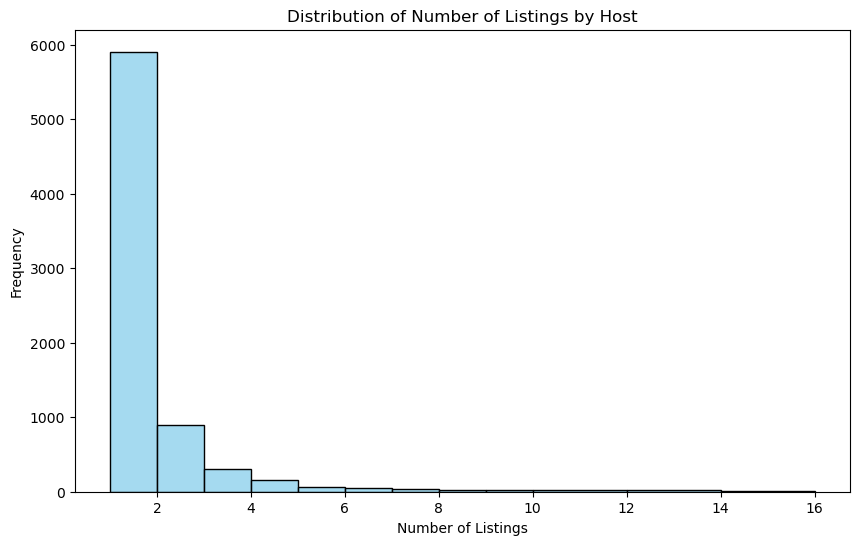

In [22]:
bins = [1, 2, 3, 4,5, 6,7, 8,9, 10,12,14, 16]

plt.figure(figsize=(10, 6))
sns.histplot(number_listings_host_df['id'], bins=bins, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Listings by Host')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.show()

In [29]:
#what is average amount of time hosts have been hosts?We don't have this value but can calculate using the host_since column.
# Convert 'host_since' column to datetime
host_info_cleaned_df['host_since'] = pd.to_datetime(host_info_cleaned_df['host_since'])

# Calculate the length of time in years and create a column for this value
host_info_cleaned_df['hosting_years'] = (pd.to_datetime('now') - host_info_cleaned_df['host_since']).dt.days/365.25

# Calculate the average hosting duration in years
average_hosting_years = host_info_cleaned_df['hosting_years'].mean()

# Display the result
print("Average hosting duration in years:", average_hosting_years)

Average hosting duration in years: 7.665049317960539


/var/folders/jj/dm8tbcj11273_w688qyz4jmh0000gp/T/ipykernel_23264/358904173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_info_cleaned_df['host_since'] = pd.to_datetime(host_info_cleaned_df['host_since'])
/var/folders/jj/dm8tbcj11273_w688qyz4jmh0000gp/T/ipykernel_23264/358904173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_info_cleaned_df['hosting_years'] = (pd.to_datetime('now') - host_info_cleaned_df['host_since']).dt.days/365.25


In [30]:
host_info_cleaned_df = host_info_cleaned_df     

In [31]:
host_info_cleaned_df.columns

Index(['id', 'host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'price', 'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'city', 'hosting_years'],
      dtype='object')

In [32]:
#what is average hosting years by city?
average_hosting_years_city = host_info_cleaned_df.groupby("city")[["hosting_years"]].mean()
average_hosting_years_city.head()

,hosting_years
city,
Boston,7.750925
Denver,7.790125
Nashville,7.027225
Portland,8.599993


In [33]:
#does number of years hosting correlate with higher ratings?
#1. create a df with the hosting years in it, and narrow to the core items we want to evaluate, hosting years, review scores, city.
#create new df with subset of columns
years_to_rating= pd.DataFrame(host_info_cleaned_df[["id","host_id", "hosting_years", "review_scores_rating", "city"]])
years_to_rating.set_index("id", inplace=True)
years_to_rating.head()

,host_id,hosting_years,review_scores_rating,city
id,,,,
360,666,15.504449,4.99,Denver
590,933,15.468857,4.85,Denver
592,933,15.468857,4.87,Denver
686,990,15.463381,4.76,Denver
1940,2150,15.397673,4.95,Denver


/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

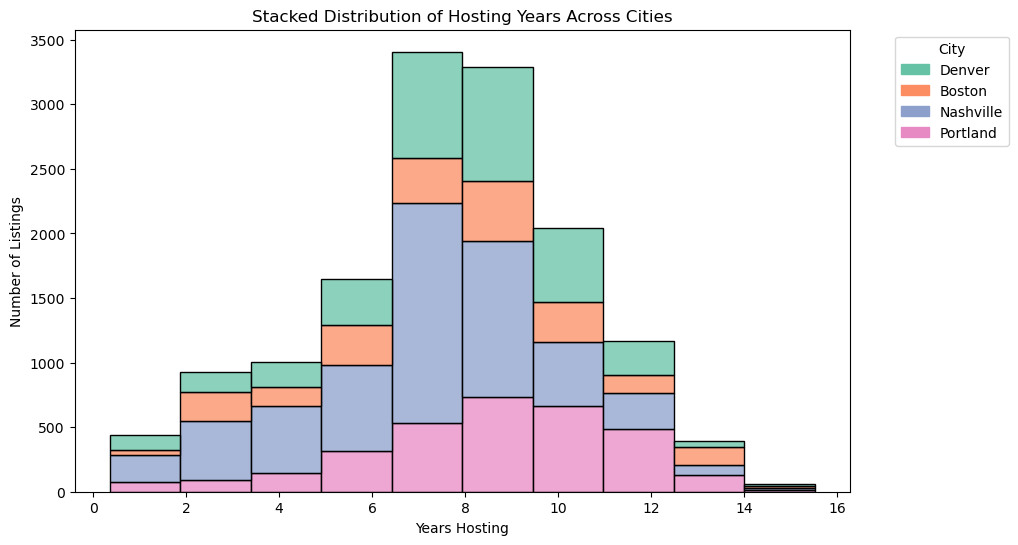

In [35]:

#display the distribution of the hosting years by city to visualize the grouping/distribution of experience of hosts by city
plt.figure(figsize=(10, 6))
ax = sns.histplot(host_info_cleaned_df, x='hosting_years', hue='city', bins=10, kde=False, multiple="stack", palette='Set2')

# Manually create the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette("Set2")]
plt.legend(handles, host_info_cleaned_df['city'].unique(), title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Stacked Distribution of Hosting Years Across Cities')
plt.xlabel('Years Hosting')
plt.ylabel('Number of Listings')
plt.show()


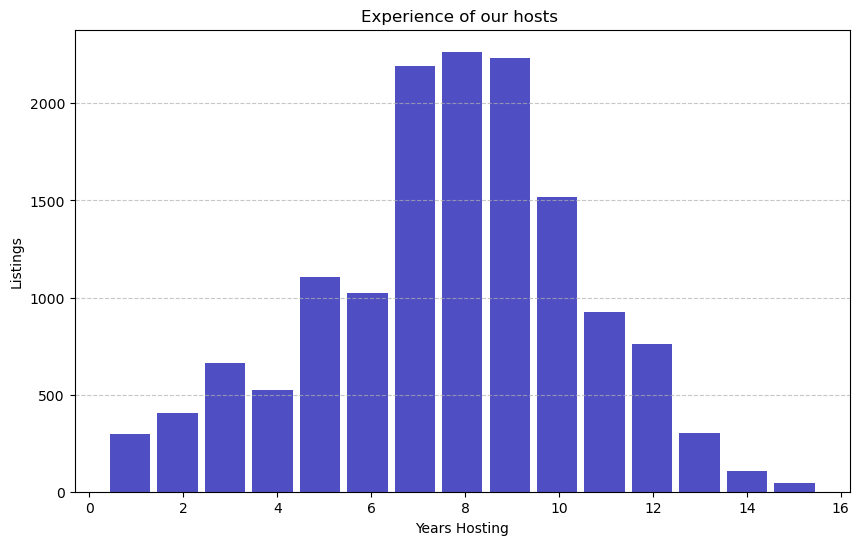

In [48]:
#SLIDE #8:  Because city isn't a factor in the host analysis we reran the data to simplify the chart to show only all together
plt.figure(figsize=(10, 6))
plt.hist(host_info_cleaned_df['hosting_years'], bins=15, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Experience of our hosts ')
plt.xlabel('Years Hosting')
plt.ylabel('Listings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [36]:
#Explore the correlation for the years hosting to the rating - 
#drop city as not needed
no_city_yrs_review = years_to_rating.drop(columns="city")
no_city_yrs_review.head()

,host_id,hosting_years,review_scores_rating
id,,,
360,666,15.504449,4.99
590,933,15.468857,4.85
592,933,15.468857,4.87
686,990,15.463381,4.76
1940,2150,15.397673,4.95


In [58]:
#is there a corr betweenhosting years and review scores?
years_to_rating_review = no_city_yrs_review.corr()
years_to_rating_review.unstack().sort_values()
#duration of hosting doesn't appear to influence the review scores rating

host_id               hosting_years          -0.932432
hosting_years         host_id                -0.932432
host_id               review_scores_rating   -0.081184
review_scores_rating  host_id                -0.081184
hosting_years         review_scores_rating    0.065972
review_scores_rating  hosting_years           0.065972
host_id               host_id                 1.000000
hosting_years         hosting_years           1.000000
review_scores_rating  review_scores_rating    1.000000
dtype: float64

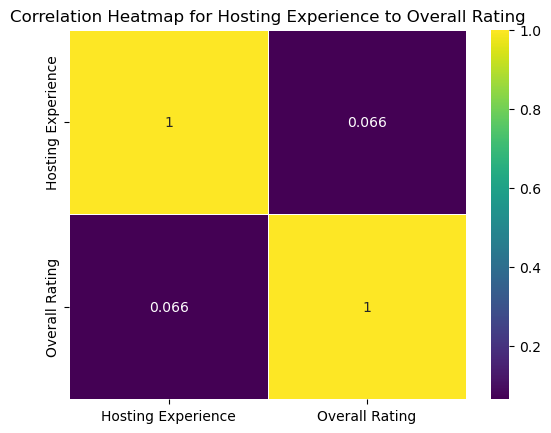

In [62]:
#SLIDE #9 To simplify the heatmap - isolate on the two items we're exploring - hosting years: review_scores_rating
corr = no_city_yrs_review[["hosting_years","review_scores_rating"]].corr()
sns.heatmap(corr, annot=True, cmap="viridis",linewidths=.5, yticklabels=["Hosting Experience", "Overall Rating"], xticklabels=["Hosting Experience", "Overall Rating"])
plt.title('Correlation Heatmap for Hosting Experience to Overall Rating')
plt.show()



In [40]:
#now look at the responsiveness of the host to the rating
response_to_rating= pd.DataFrame(host_info_cleaned_df[["id","host_id", "host_response_time", "review_scores_rating", "city"]])
response_to_rating.set_index("id", inplace=True)
response_to_rating.head()

,host_id,host_response_time,review_scores_rating,city
id,,,,
360,666,within an hour,4.99,Denver
590,933,within an hour,4.85,Denver
592,933,within an hour,4.87,Denver
686,990,within a few hours,4.76,Denver
1940,2150,within an hour,4.95,Denver


In [41]:
#we could look at converting the host_reponse time to a scale in order to give it a numeric value if we wanted to do a correlation?

In [42]:
#identify the number of responses for each category
value_counts = response_to_rating['host_response_time'].value_counts()

# Display the count of instances for each unique value
print(value_counts)


host_response_time
within an hour        12594
within a few hours     1225
within a day            489
a few days or more       55
Name: count, dtype: int64


In [43]:
#create a map to each value that has numerical value
response_time_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

# Apply the mapping to convert string to numerical values, handling NaN values
response_to_rating['host_response_time_numeric'] = response_to_rating['host_response_time'].map(response_time_mapping)

# Now drop the original 'host_response_time' column 
response_to_rating.drop('host_response_time', axis=1, inplace=True)

# Drop the 'city' column for the correlation
response_to_rating.drop('city', axis=1, inplace=True)

# Perform the correlation analysis
correlation_matrix = response_to_rating.corr()

# Display the correlation matrix
print(correlation_matrix)


                             host_id  review_scores_rating  \
host_id                     1.000000             -0.081184   
review_scores_rating       -0.081184              1.000000   
host_response_time_numeric  0.082651              0.028723   

                            host_response_time_numeric  
host_id                                       0.082651  
review_scores_rating                          0.028723  
host_response_time_numeric                    1.000000  


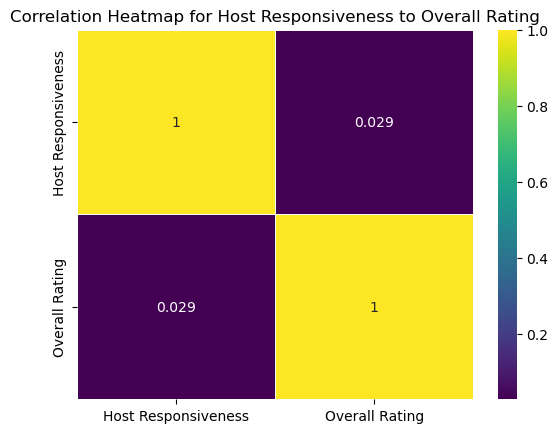

In [63]:
#visualize the correlation
corr = response_to_rating[["host_response_time_numeric","review_scores_rating"]].corr()
sns.heatmap(corr, annot=True, cmap="viridis",linewidths=.5, yticklabels=["Host Responsiveness", "Overall Rating"], xticklabels=["Host Responsiveness", "Overall Rating"])
plt.title('Correlation Heatmap for Host Responsiveness to Overall Rating')
plt.show()